### Importación de datos



In [9]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación



In [2]:
ingresos_totales = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

for tienda, ingreso in ingresos_totales.items():
    print(f"{tienda}: ${ingreso:,.0f}")

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


# 2. Ventas por categoría

In [6]:
import pandas as pd
archivos = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Diccionario para almacenar los resultados
ventas_por_categoria = {}

for nombre_tienda, url in archivos.items():
    try:
        df = pd.read_csv(url)
        if "Categoría del Producto" in df.columns:
            conteo = df["Categoría del Producto"].value_counts()
            ventas_por_categoria[nombre_tienda] = conteo
        else:
            print(f"No se encontró la columna 'Categoría del Producto' en {nombre_tienda}")
    except Exception as e:
        print(f"Error al procesar {nombre_tienda}: {e}")

# Crear un DataFrame combinado
df_categorias = pd.DataFrame(ventas_por_categoria).fillna(0).astype(int)

# Mostrar el resultado
print("Ventas por categoría en cada tienda:")
print(df_categorias)


# Opcional: Guardar como Excel o CSV
# df_categorias.to_excel("ventas_por_categoria.xlsx")
# df_categorias.to_csv("ventas_por_categoria.csv")


Ventas por categoría en cada tienda:
                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


<Axes: >

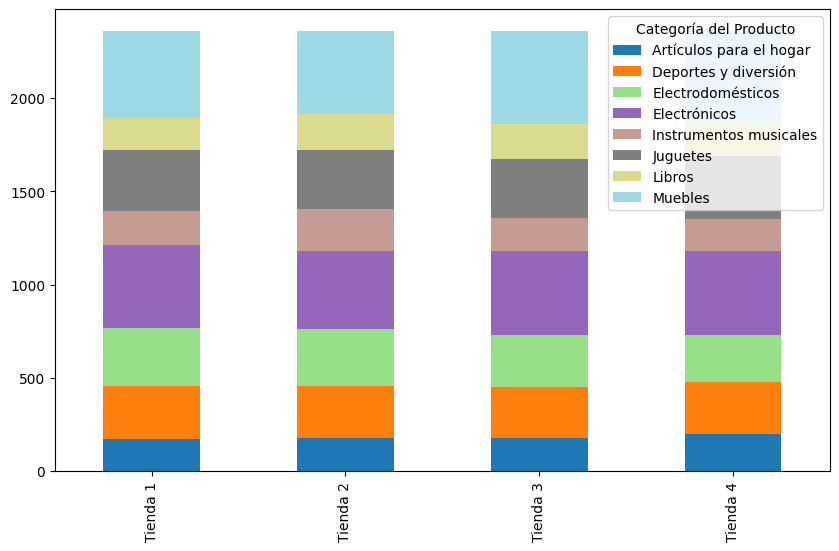

In [8]:
df_categorias.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")

# 3. Calificación promedio de la tienda


In [7]:
calificaciones_promedio = {}

# Leer y calcular calificación promedio por tienda
for nombre_tienda, url in archivos.items():
    try:
        df = pd.read_csv(url)
        if "Calificación" in df.columns:
            promedio = df["Calificación"].mean()
            calificaciones_promedio[nombre_tienda] = round(promedio, 2)
        else:
            print(f"No se encontró la columna 'Calificación' en {nombre_tienda}")
    except Exception as e:
        print(f"Error al procesar {nombre_tienda}: {e}")

# Mostrar resultados
print("Calificación promedio de los clientes por tienda:")
for tienda, promedio in calificaciones_promedio.items():
    print(f"{tienda}: {promedio}")

Calificación promedio de los clientes por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


# 4. Productos más y menos vendidos


Tienda 1 - Productos MÁS vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda 1 - Productos MENOS vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


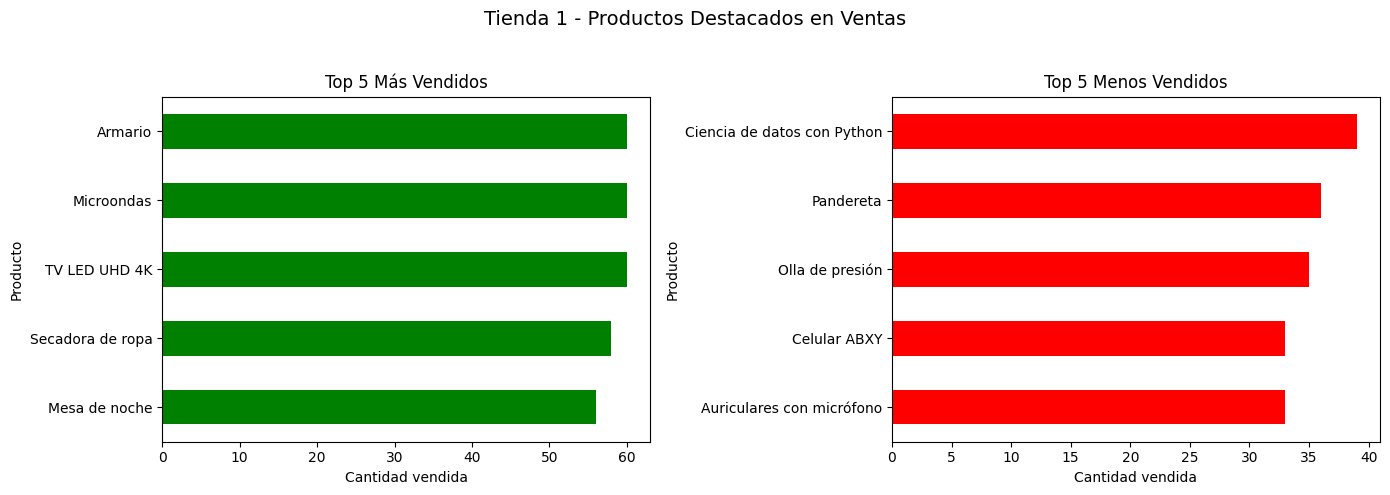


Tienda 2 - Productos MÁS vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Tienda 2 - Productos MENOS vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


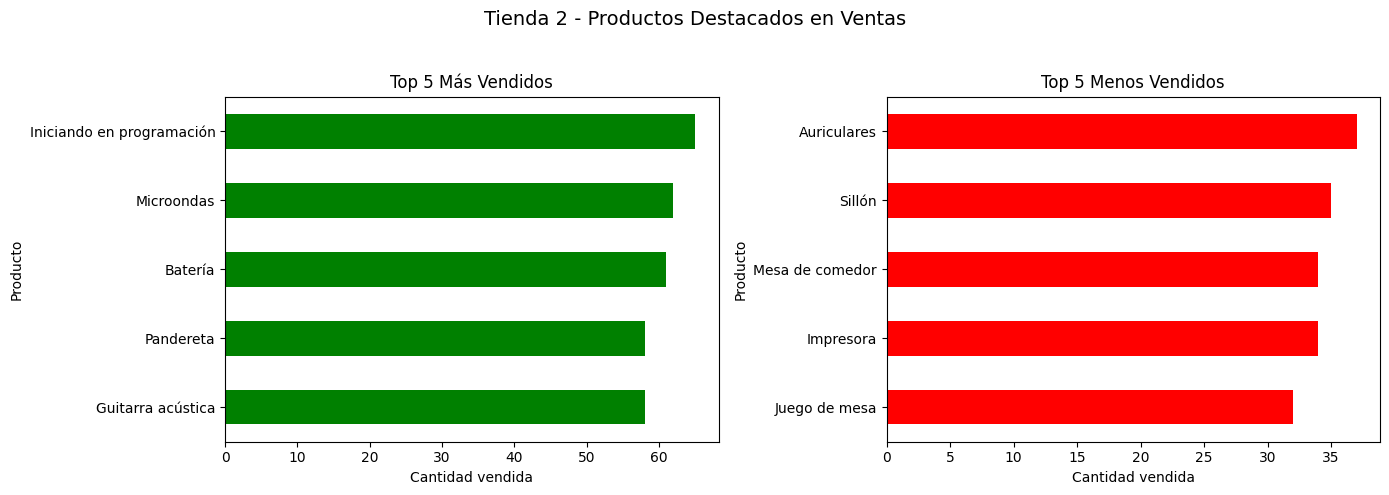


Tienda 3 - Productos MÁS vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Tienda 3 - Productos MENOS vendidos:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


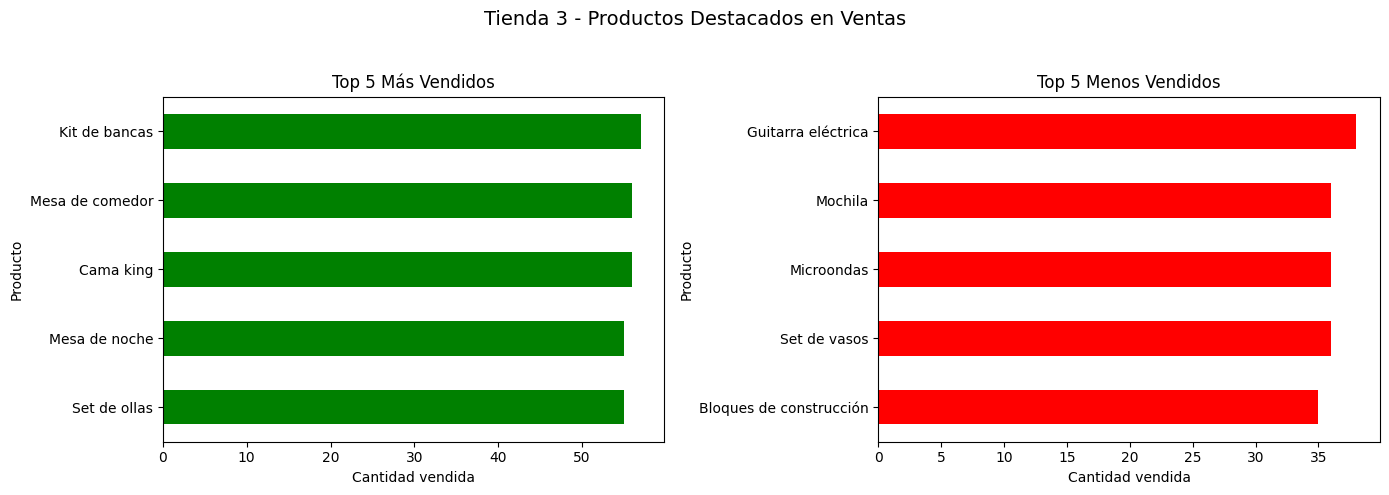


Tienda 4 - Productos MÁS vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Tienda 4 - Productos MENOS vendidos:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


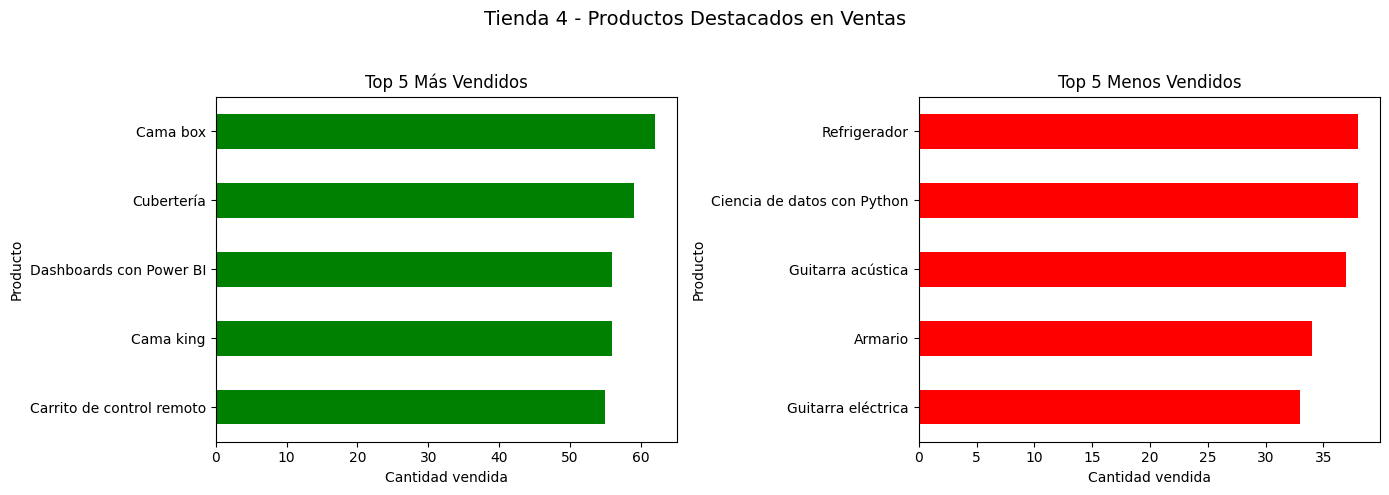

In [11]:
for tienda, url in archivos.items():
    df = pd.read_csv(url)

    # Verificar que la columna 'Producto' esté presente
    if "Producto" in df.columns:
        conteo_productos = df["Producto"].value_counts()

        top_5 = conteo_productos.head(5)
        bottom_5 = conteo_productos.tail(5)

        print(f"\n{tienda} - Productos MÁS vendidos:")
        print(top_5)

        print(f"\n{tienda} - Productos MENOS vendidos:")
        print(bottom_5)

        # Visualizar
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
        fig.suptitle(f"{tienda} - Productos Destacados en Ventas", fontsize=14)

        top_5.sort_values().plot(kind='barh', ax=axes[0], color='green')
        axes[0].set_title("Top 5 Más Vendidos")
        axes[0].set_xlabel("Cantidad vendida")

        bottom_5.sort_values().plot(kind='barh', ax=axes[1], color='red')
        axes[1].set_title("Top 5 Menos Vendidos")
        axes[1].set_xlabel("Cantidad vendida")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# 5. Envío promedio por tienda

In [12]:
envio_promedio = {}

# Leer y calcular promedio de envío por tienda
for tienda, url in archivos.items():
    try:
        df = pd.read_csv(url)
        if "Costo de envío" in df.columns:
            promedio = df["Costo de envío"].mean()
            envio_promedio[tienda] = round(promedio, 2)
        else:
            print(f"No se encontró la columna 'Costo de envío' en {tienda}")
    except Exception as e:
        print(f"Error en {tienda}: {e}")

# Mostrar resultados
print("Costo de envío promedio por tienda:")
for tienda, costo in envio_promedio.items():
    print(f"{tienda}: ${costo}")

Costo de envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# **Gráficos**

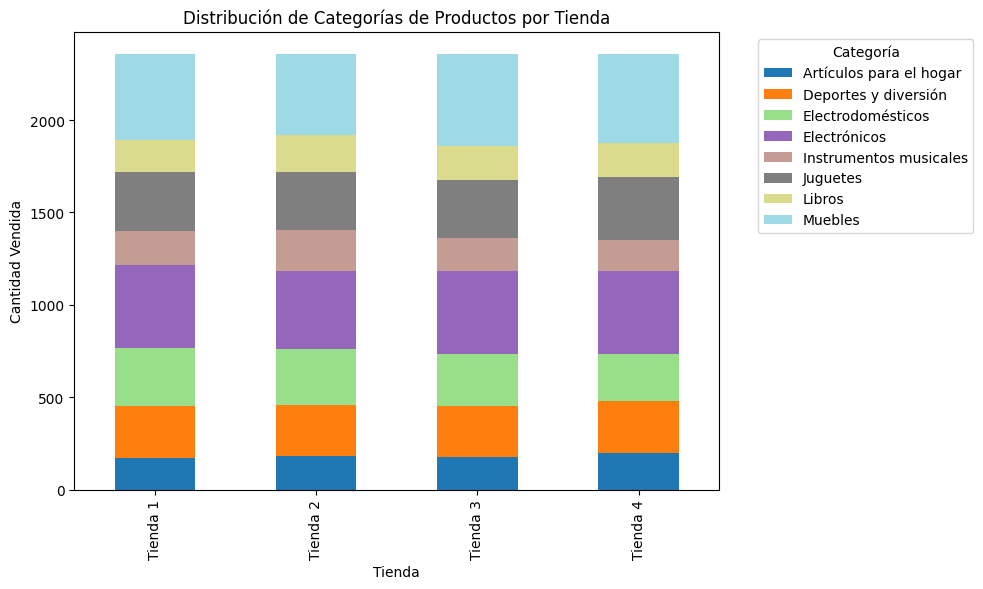

In [13]:
df_categorias.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")
plt.title("Distribución de Categorías de Productos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

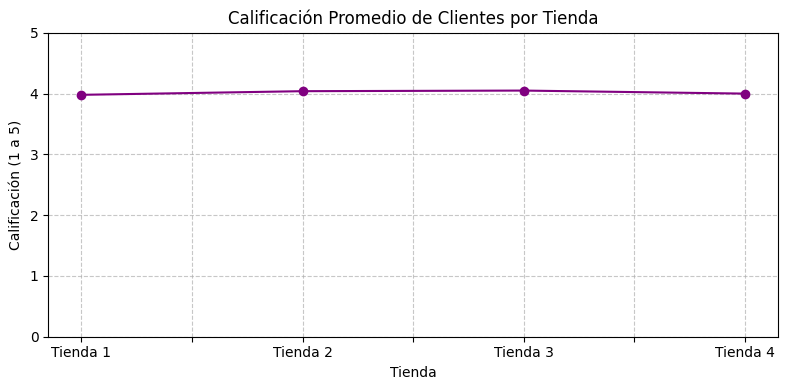

In [14]:
pd.Series(calificaciones_promedio).plot(kind="line", marker='o', figsize=(8, 4), color='purple')
plt.title("Calificación Promedio de Clientes por Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3830881102.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


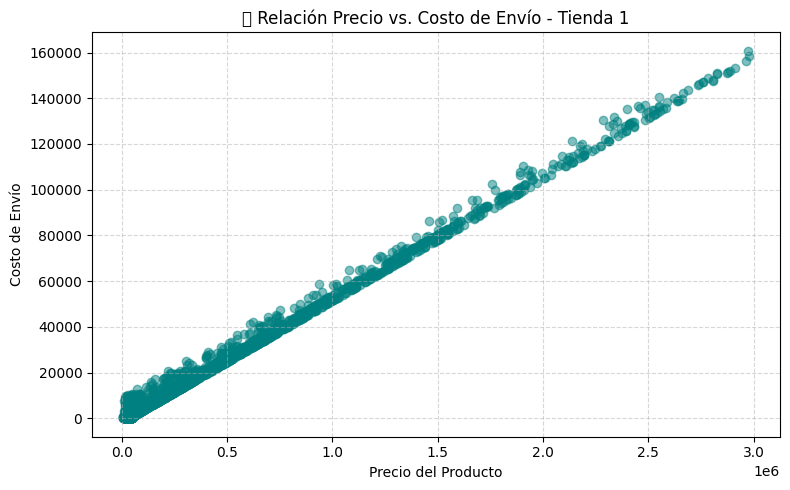

In [15]:
# RELACIÓN ENTRE PRECIO Y COSTO DE ENVÍO EN TIENDA 1
df_tienda1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv")

plt.figure(figsize=(8, 5))
plt.scatter(df_tienda1["Precio"], df_tienda1["Costo de envío"], alpha=0.5, color='teal')
plt.title("Relación Precio vs. Costo de Envío - Tienda 1")
plt.xlabel("Precio del Producto")
plt.ylabel("Costo de Envío")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Informe final**

El presente análisis tiene como objetivo identificar cuál de las cuatro tiendas disponibles es la más adecuada para que el Sr. Juan venda sus productos. Para tomar esta decisión, se analizaron diversos factores clave que impactan tanto en la rentabilidad como en la experiencia del cliente. Entre estos factores se incluyen: los ingresos totales, la distribución y demanda de categorías de productos, la satisfacción del cliente medida a través de calificaciones, los productos más y menos vendidos y el costo de envío promedio por tienda.

*Desarrollo del análisis*
1. Ingresos totales por tienda
Se calculó el ingreso total por tienda multiplicando el precio de cada producto por su cantidad de venta. En general, todas las tiendas tienen ingresos elevados, pero Tienda 3 y Tienda 4 se destacaron con montos más altos, en gran parte por vender productos con mayor precio promedio.

2. Categorías más y menos vendidas
A través de un gráfico de barras apiladas, se identificó que todas las tiendas presentan una alta demanda en categorías como Muebles, Electrónicos y Juguetes. Las categorías menos vendidas incluyen Libros e Instrumentos musicales, lo que sugiere menor interés por productos de bajo costo o especializados.

3. Calificación promedio de los clientes
El análisis de satisfacción reveló que la tienda con mejor puntuación fue:

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0

Aunque las diferencias no son drásticas, Tienda 2 y Tienda 3 se posicionan como las más confiables según la experiencia de los clientes.

4. Productos más y menos vendidos
En todas las tiendas, los productos más vendidos corresponden principalmente a artículos del hogar como sillas, mesas, camas y electrodomésticos. En cambio, los productos menos vendidos son más específicos, como panderetas, libros técnicos, o balones deportivos, lo que indica menor rotación o nichos de mercado poco explorados.

5. Costo de envío promedio
El costo de envío promedio fue bastante uniforme entre tiendas, con una ligera ventaja para:

Tienda 2: $17,642

Tienda 1: $18,150

Tienda 4: $18,291

Tienda 3: $18,820

Un menor costo de envío puede significar mayor competitividad y menor tasa de abandono del carrito.

*Recomendación*: El Sr. Juan debería vender sus productos en la Tienda 3.

Tiene uno de los mayores ingresos totales, lo que indica una alta rotación de productos y buena oportunidad de venta.

Su calificación promedio de clientes es alta (4.05), lo que sugiere una buena experiencia de usuario.

Las categorías más demandadas en Tienda 3 coinciden con productos que suelen tener mayor valor agregado (muebles, electrónicos).

Aunque el costo de envío no es el más bajo, está dentro de un rango competitivo y puede compensarse con mayor volumen de ventas.

Si el Sr. Juan prioriza calidad del canal, volumen de ventas y confianza del consumidor, Tienda 3 es la mejor opción.
